📂 正在读取数据: D:\App\Pycharm\1120MovieSchedulingSimulation\logs\rotten_movies\rotten_evaluation_results.csv
📂 图片将保存至: D:\App\Pycharm\1120MovieSchedulingSimulation\jupyters\plots\rotten_movie_pretty

🚀 开始绘制高级感图表，共 32 个案例...
🎨 绘图: 《哆啦A梦：大雄的月球探险记》


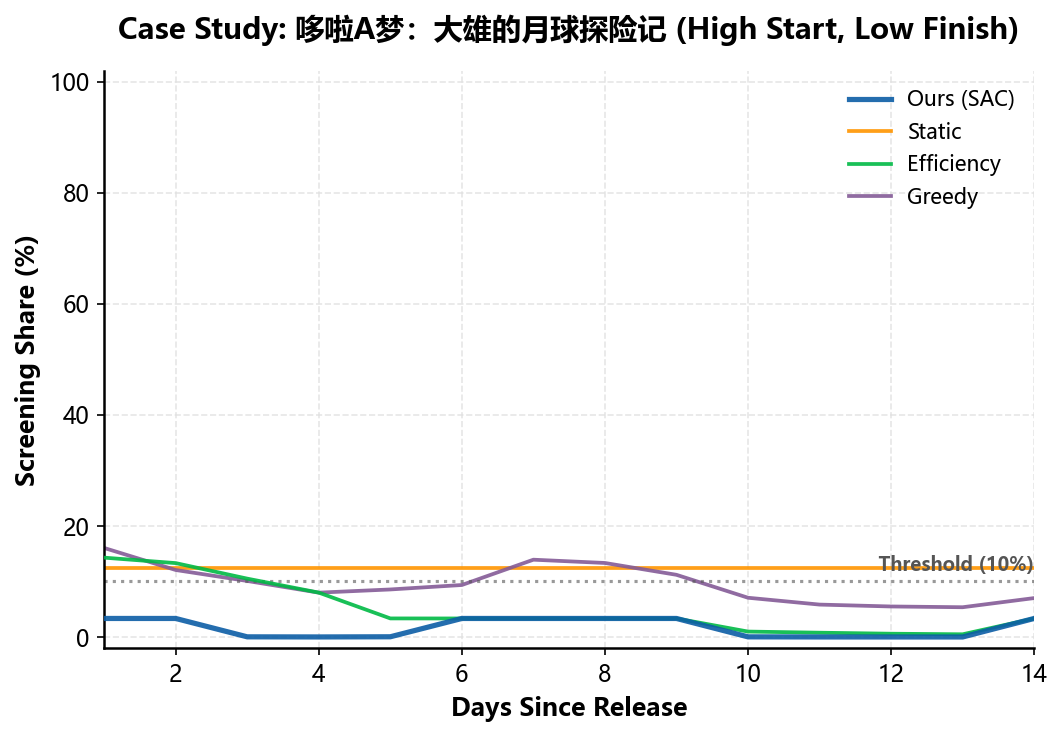

🎨 绘图: 《上海堡垒》


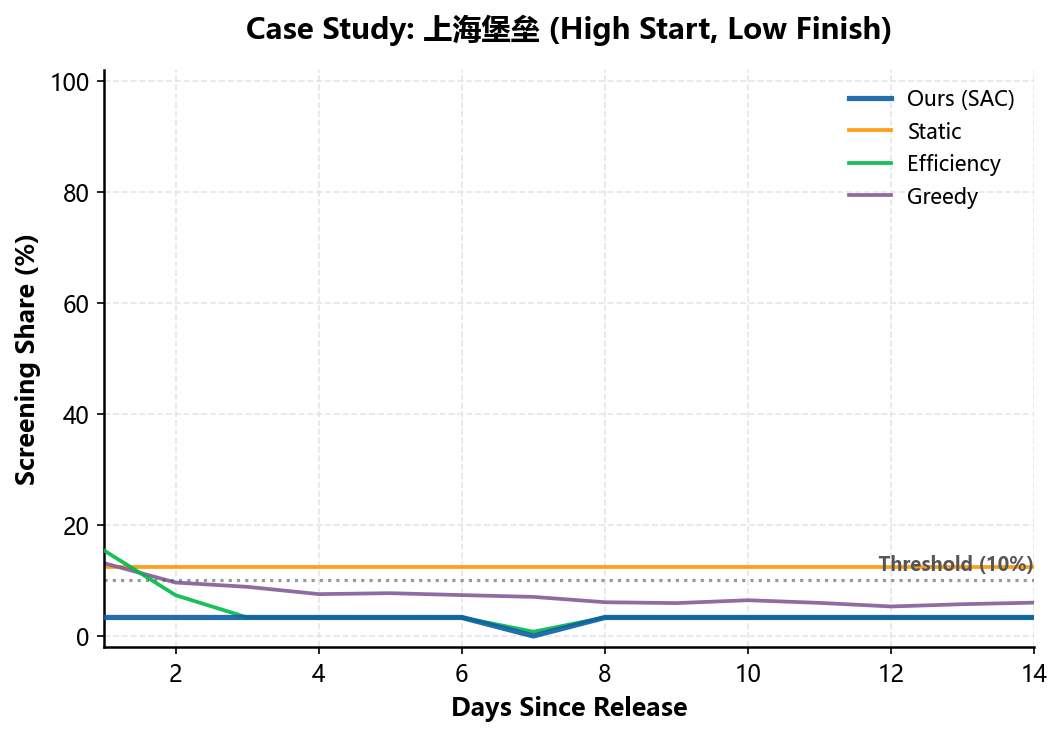

🎨 绘图: 《小Q》


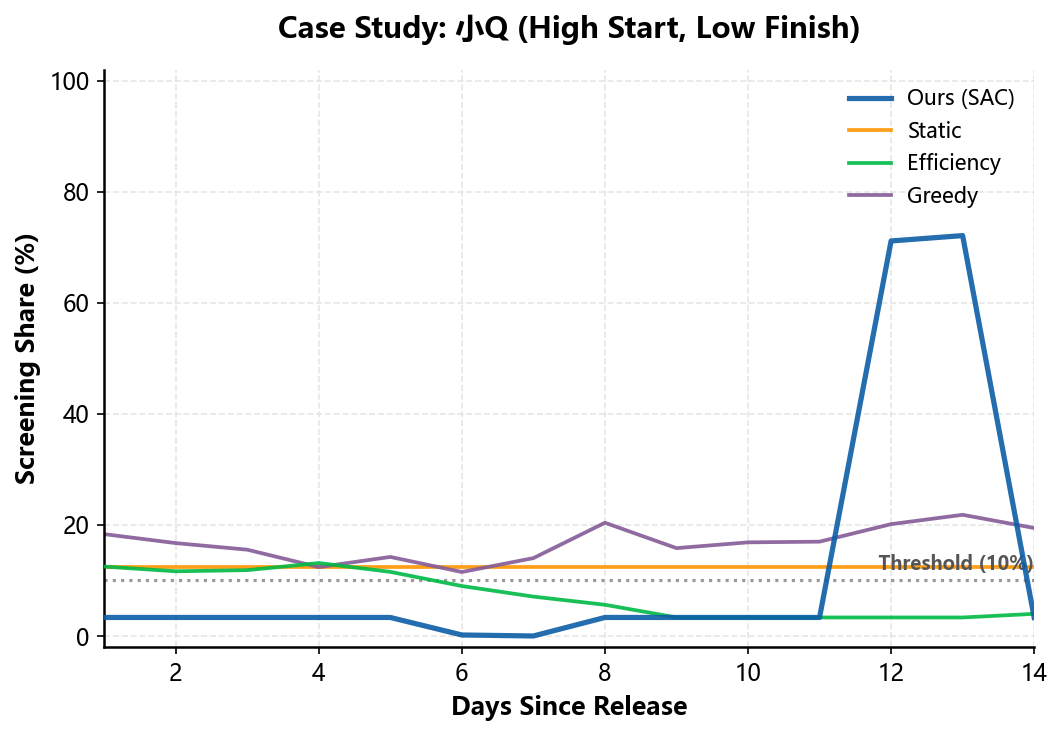

🎨 绘图: 《多力特的奇幻冒险》


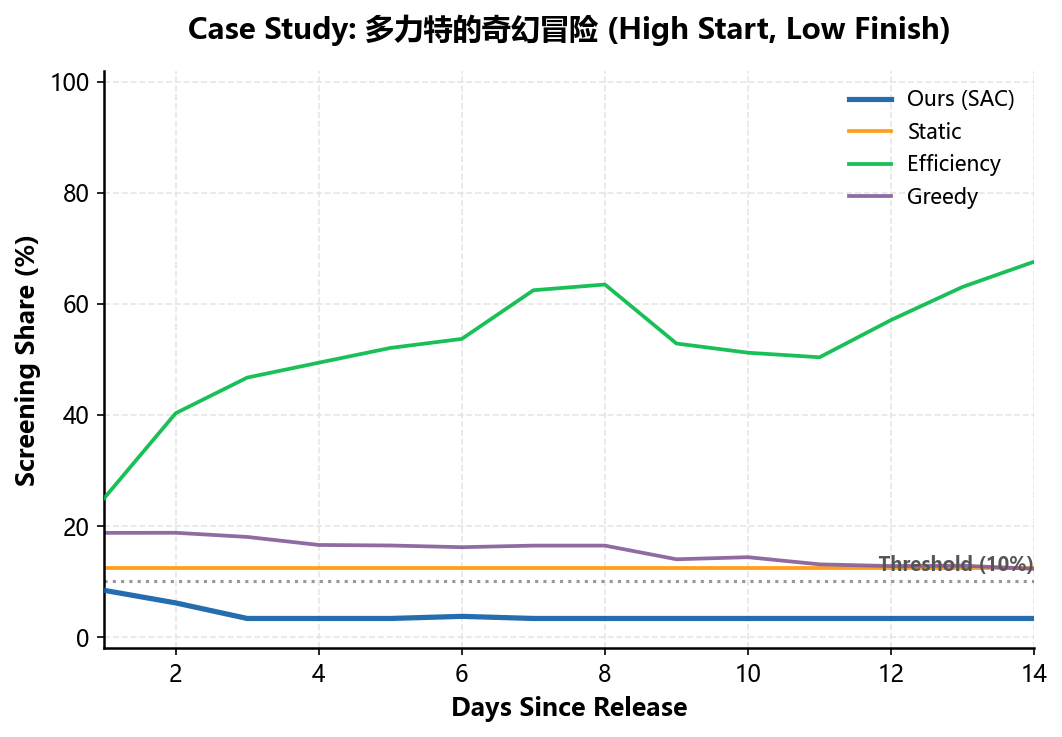

🎨 绘图: 《喋血战士》


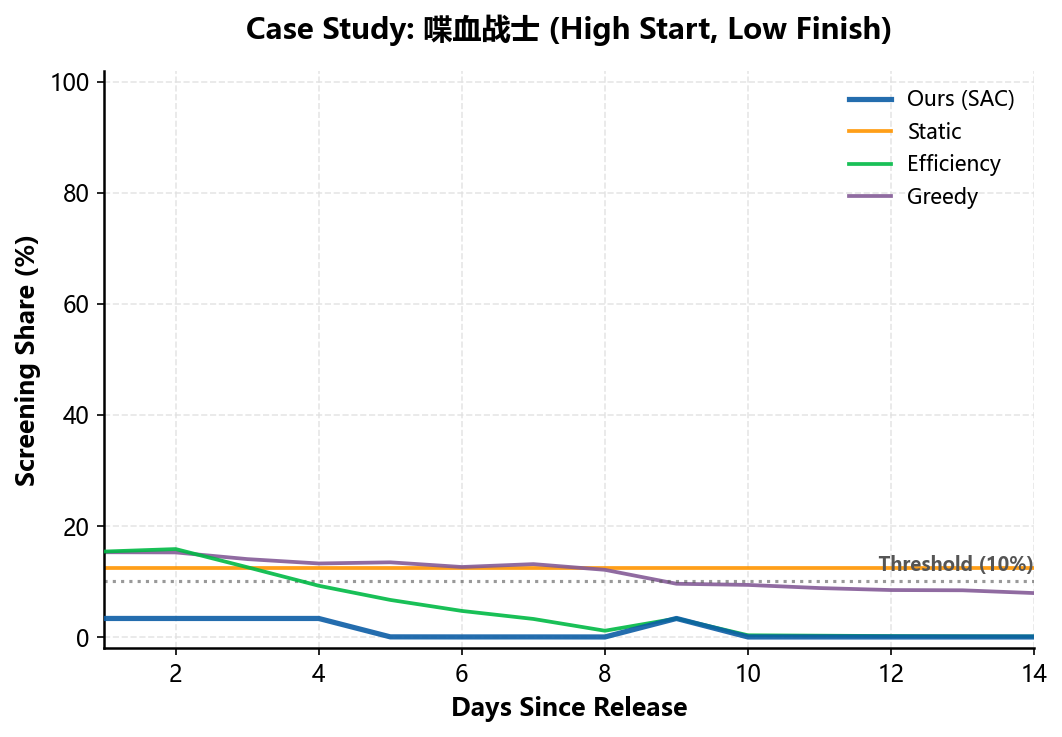

🎨 绘图: 《抵达之谜》


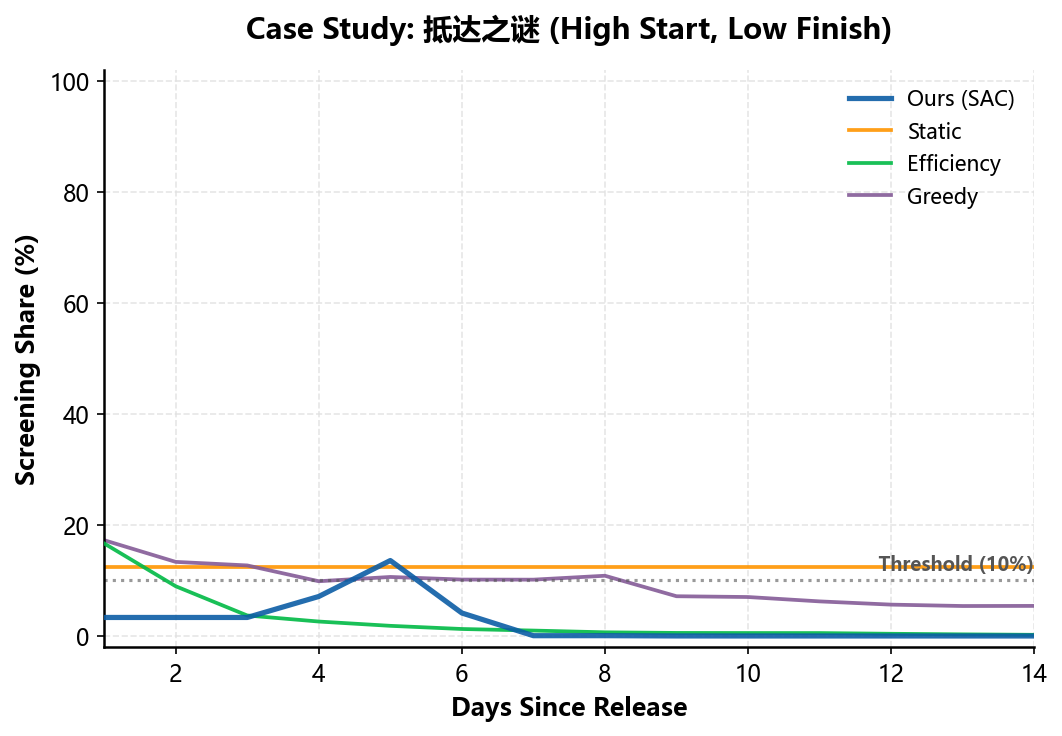

🎨 绘图: 《1917》


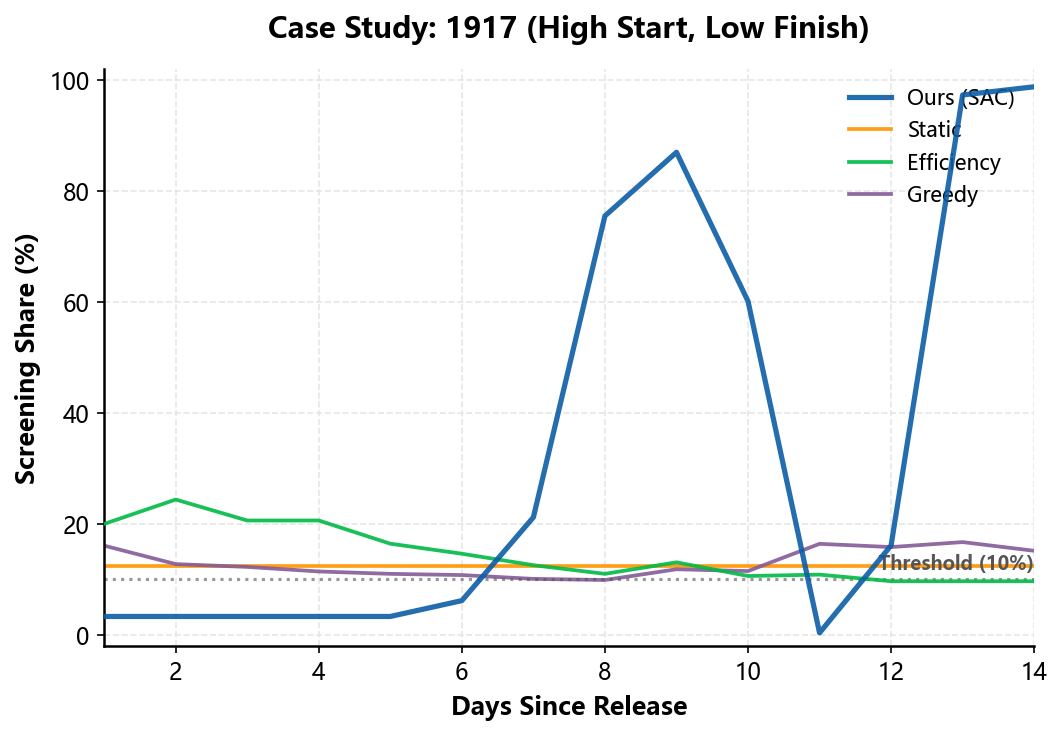

🎨 绘图: 《数码宝贝大冒险：最后的进化》


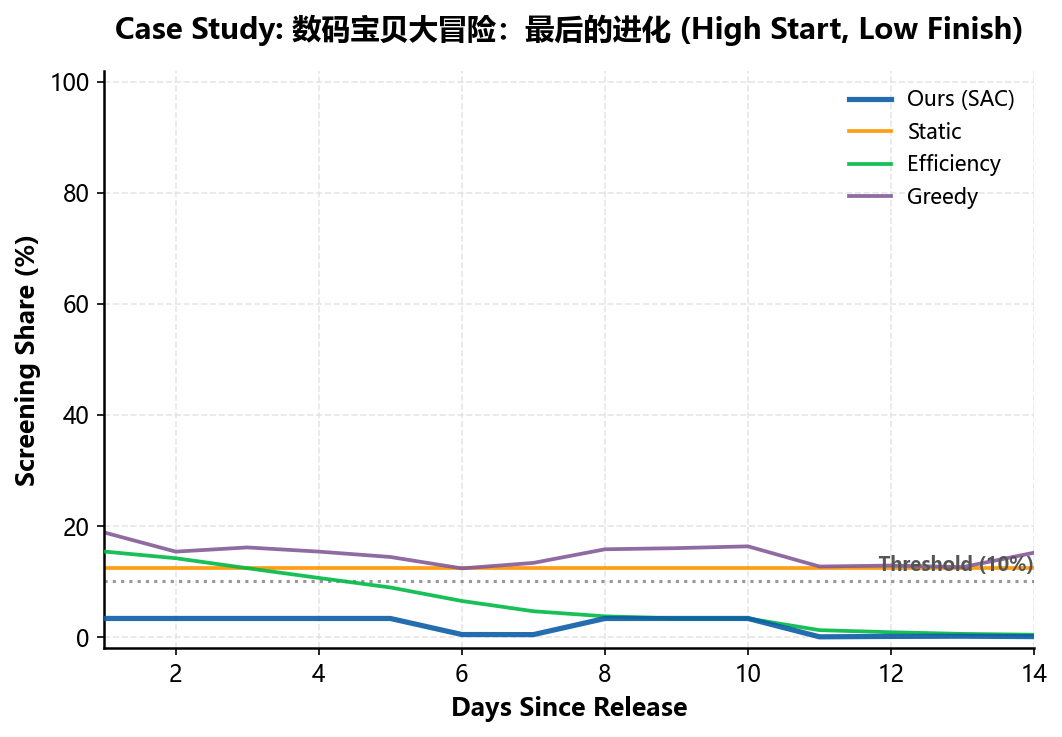

🎨 绘图: 《地狱男爵：血皇后崛起》


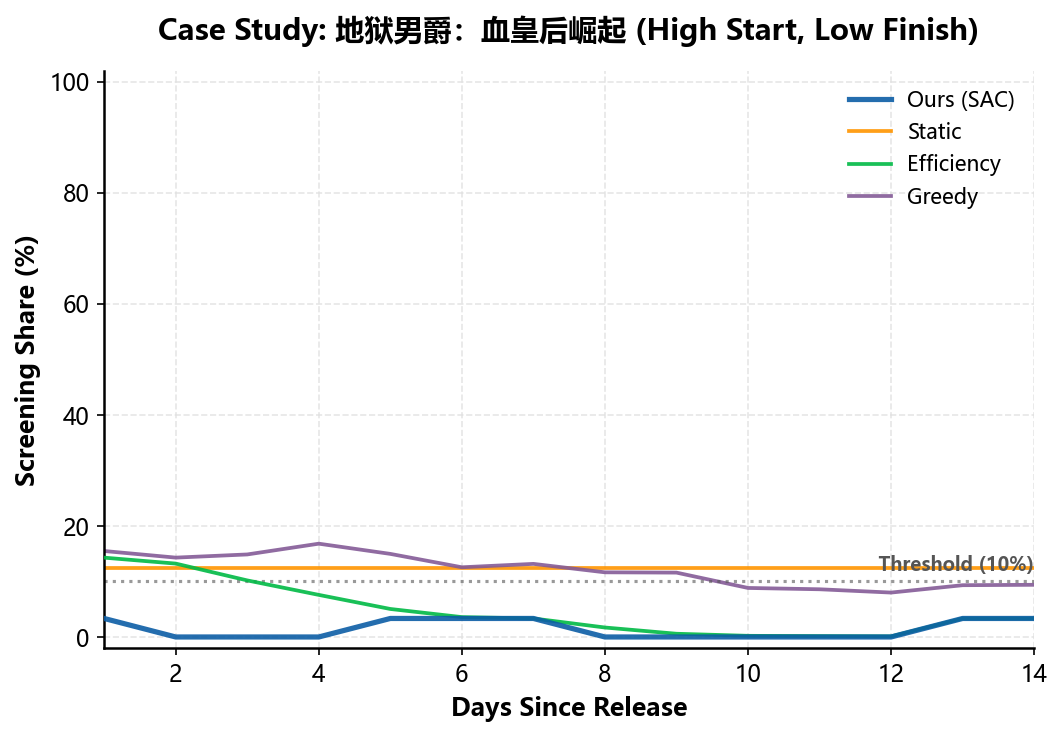

🎨 绘图: 《一秒钟》


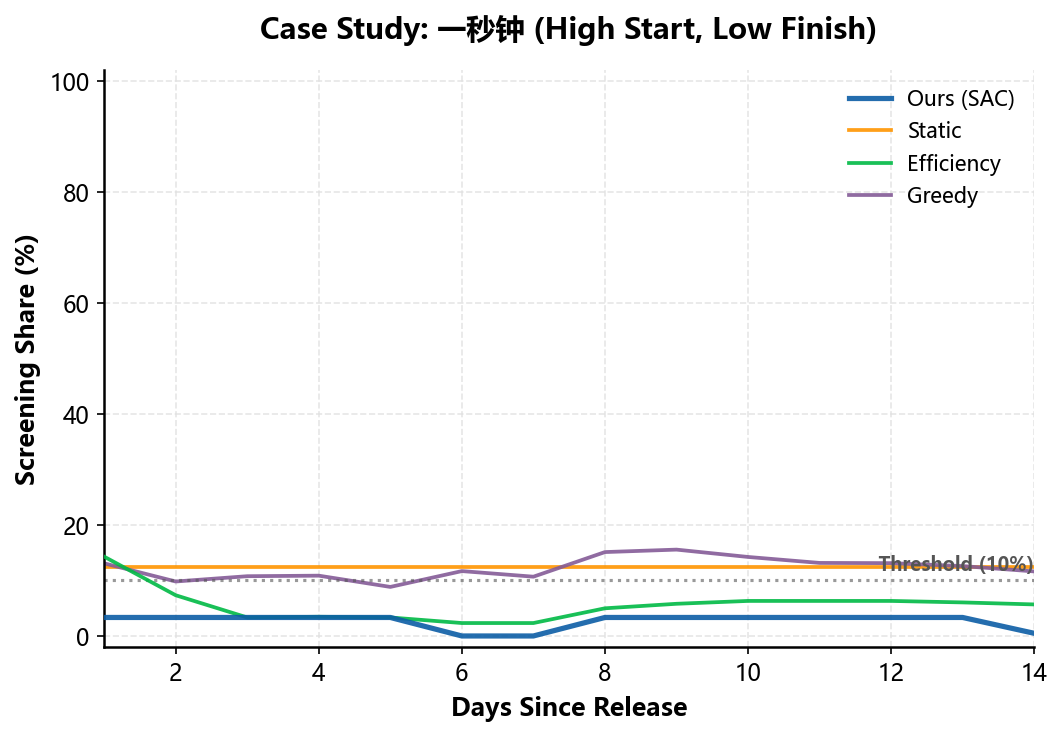

🎨 绘图: 《猫和老鼠》


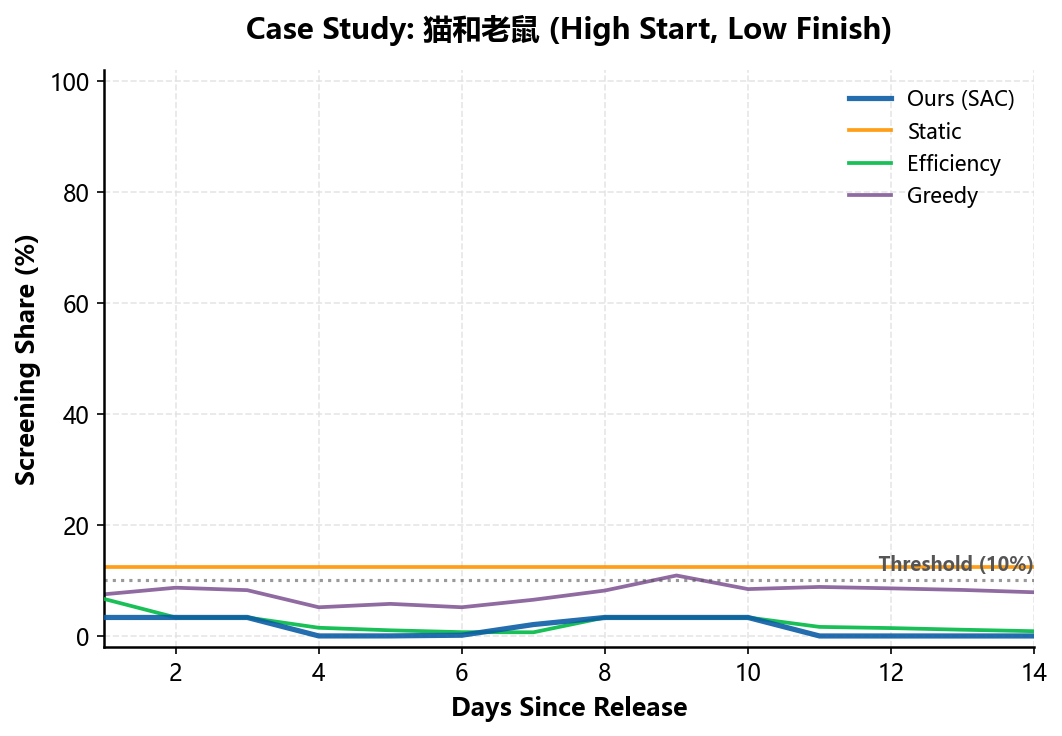

🎨 绘图: 《你好世界》


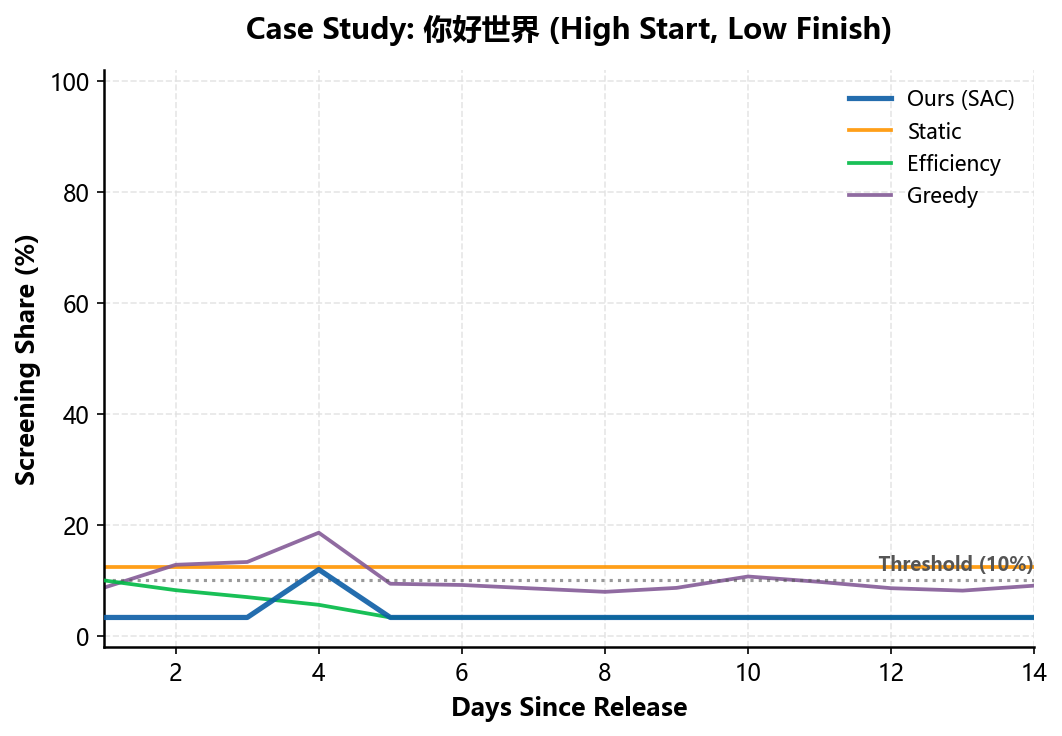

🎨 绘图: 《了不起的老爸》


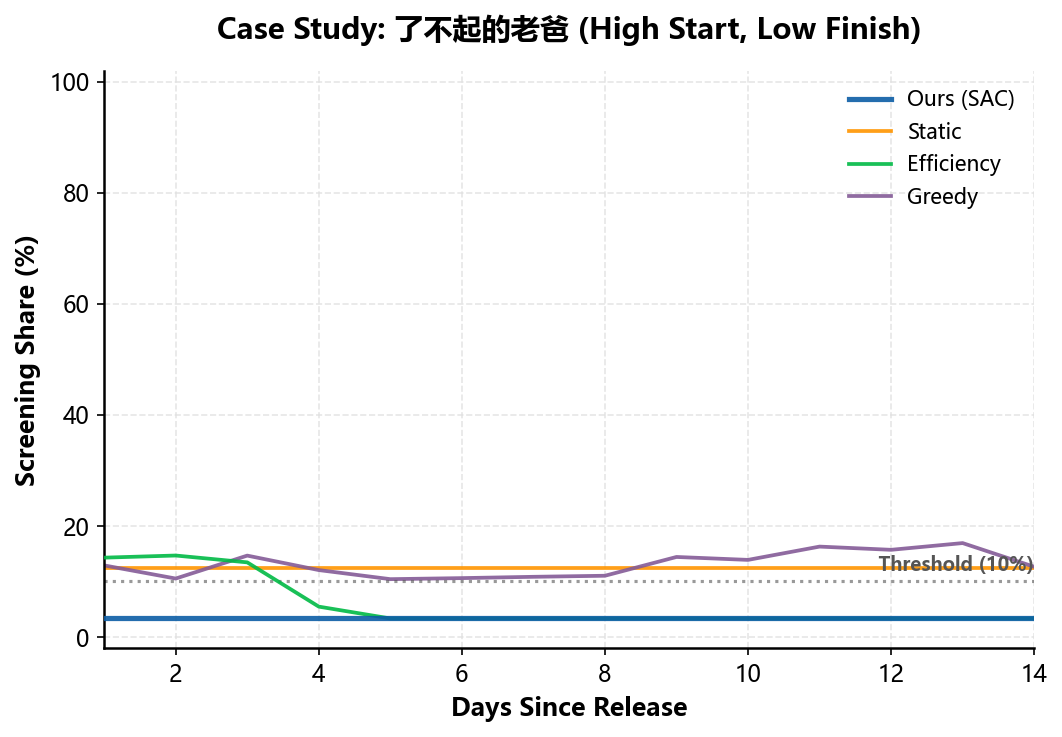

🎨 绘图: 《我没谈完的那场恋爱》


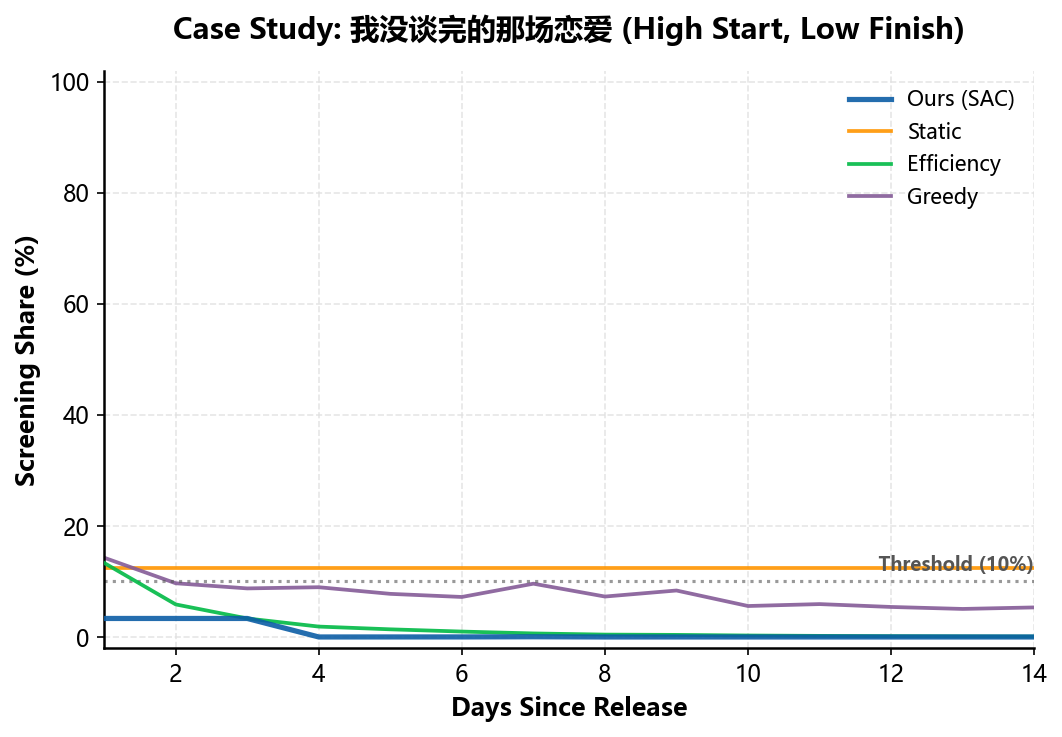

🎨 绘图: 《革命者》


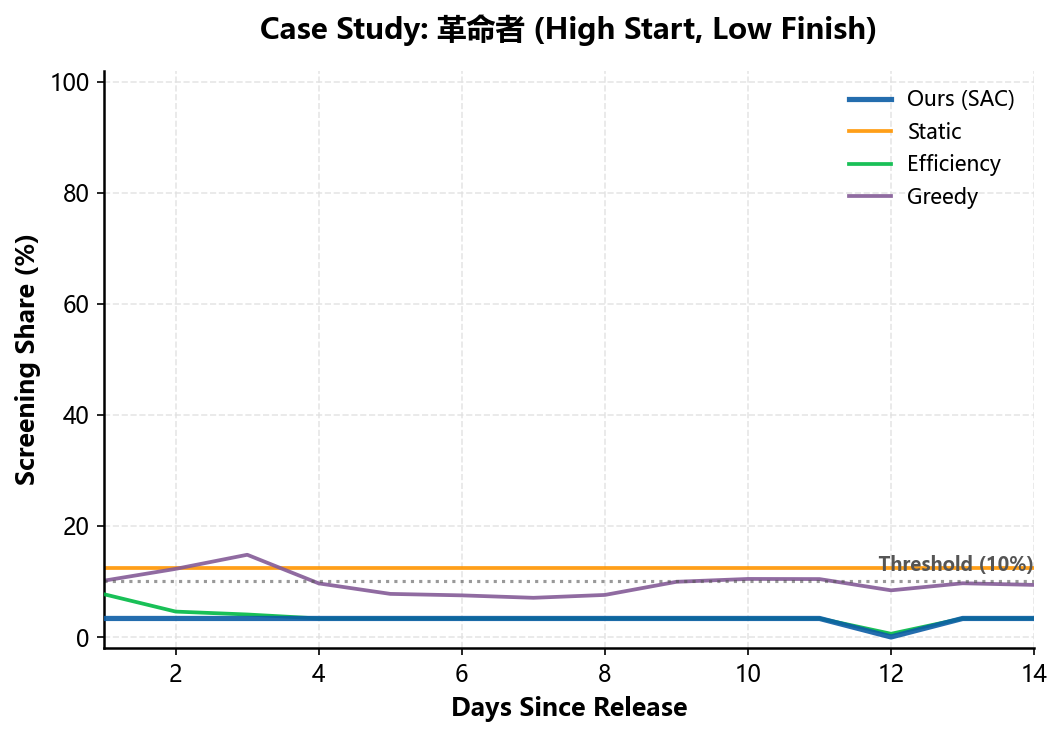

🎨 绘图: 《梅艳芳》


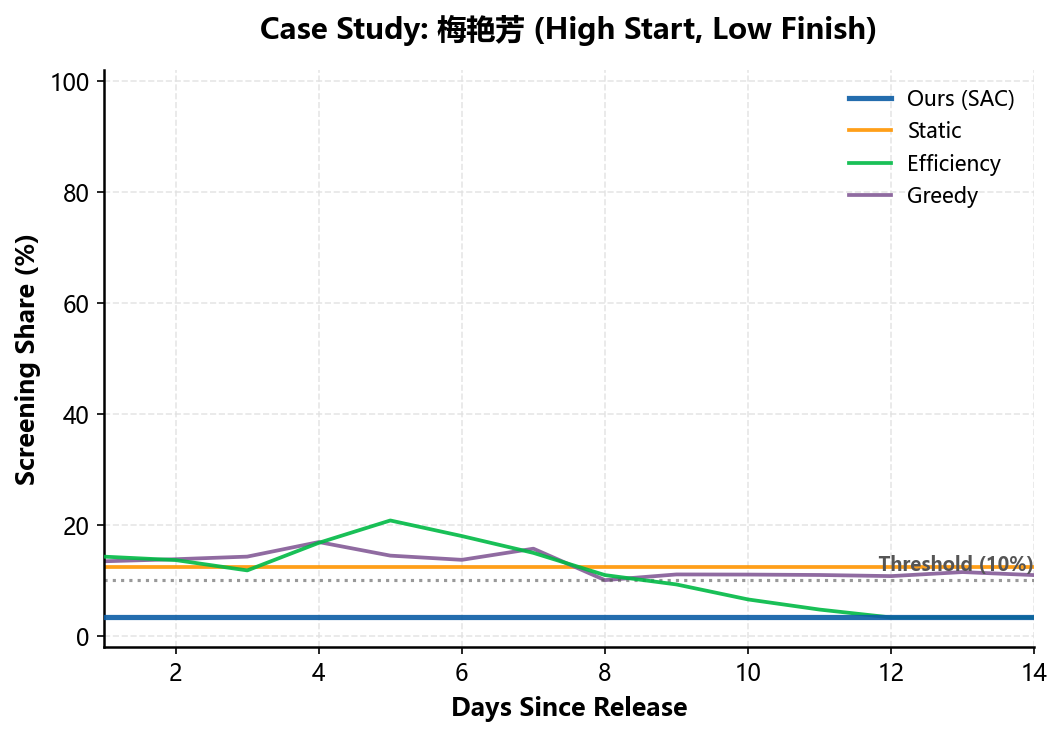

🎨 绘图: 《铁道英雄》


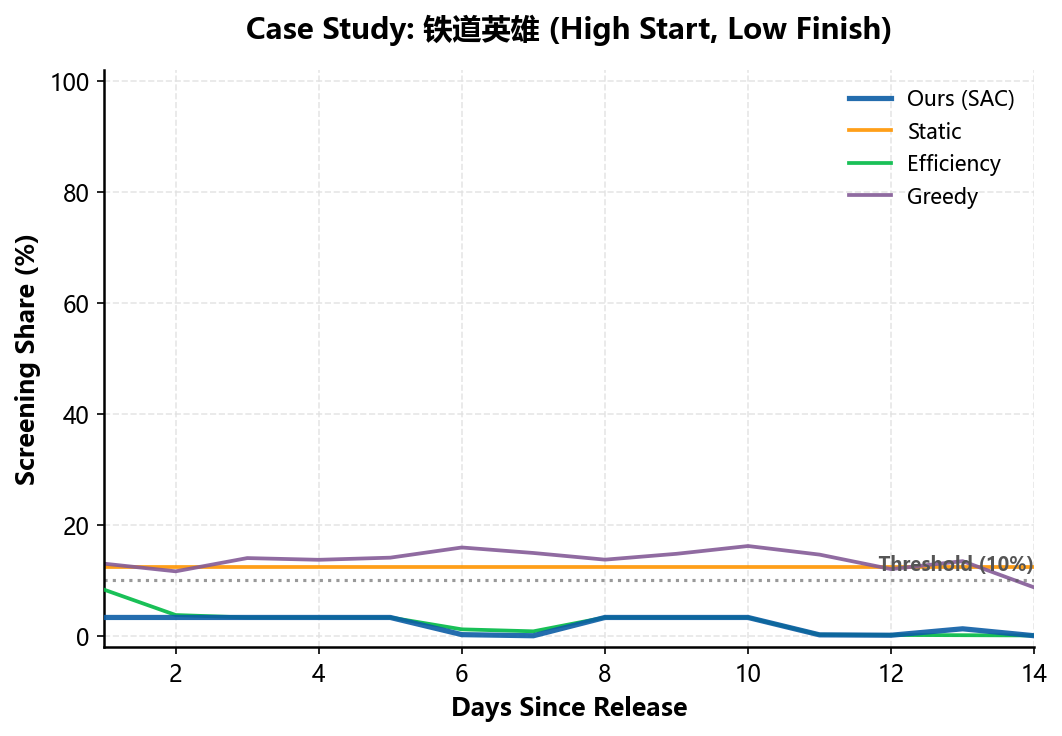

🎨 绘图: 《黑客帝国：矩阵重启》


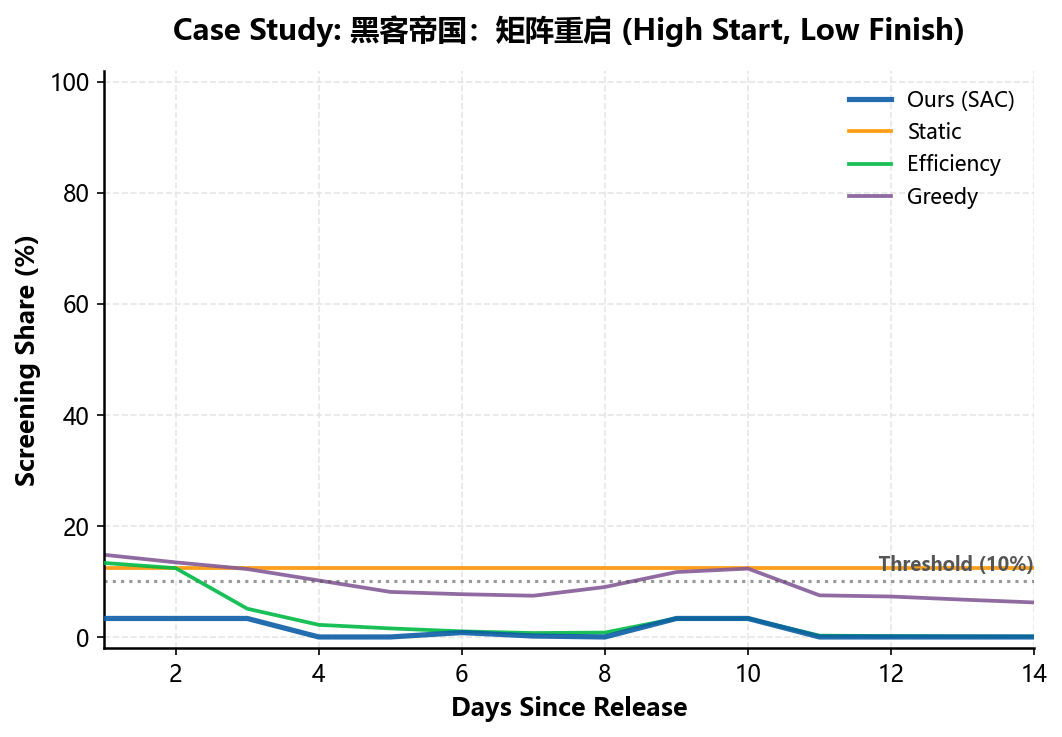

🎨 绘图: 《神秘海域》


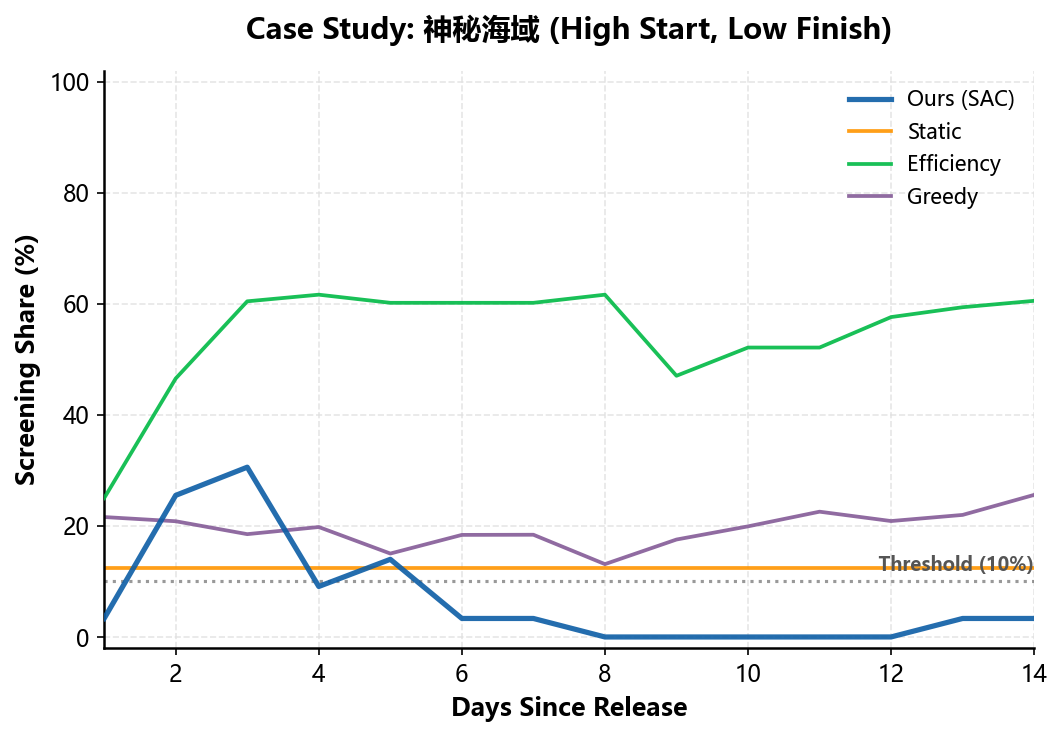

🎨 绘图: 《精灵旅社4：变身大冒险》


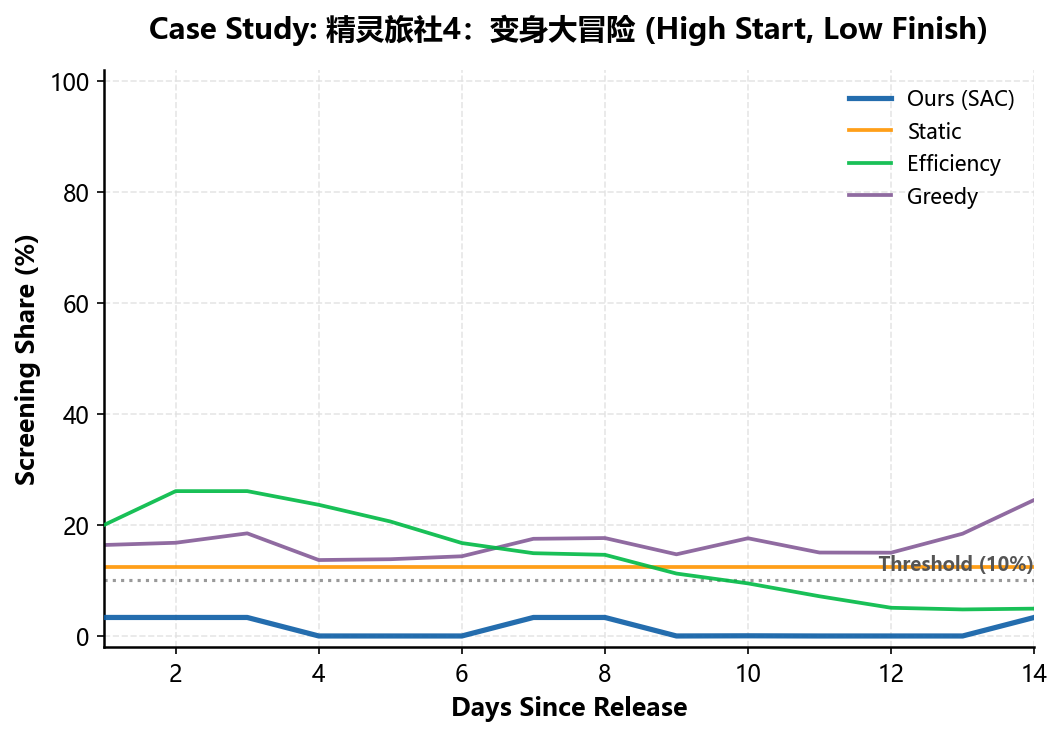

🎨 绘图: 《边缘行者》


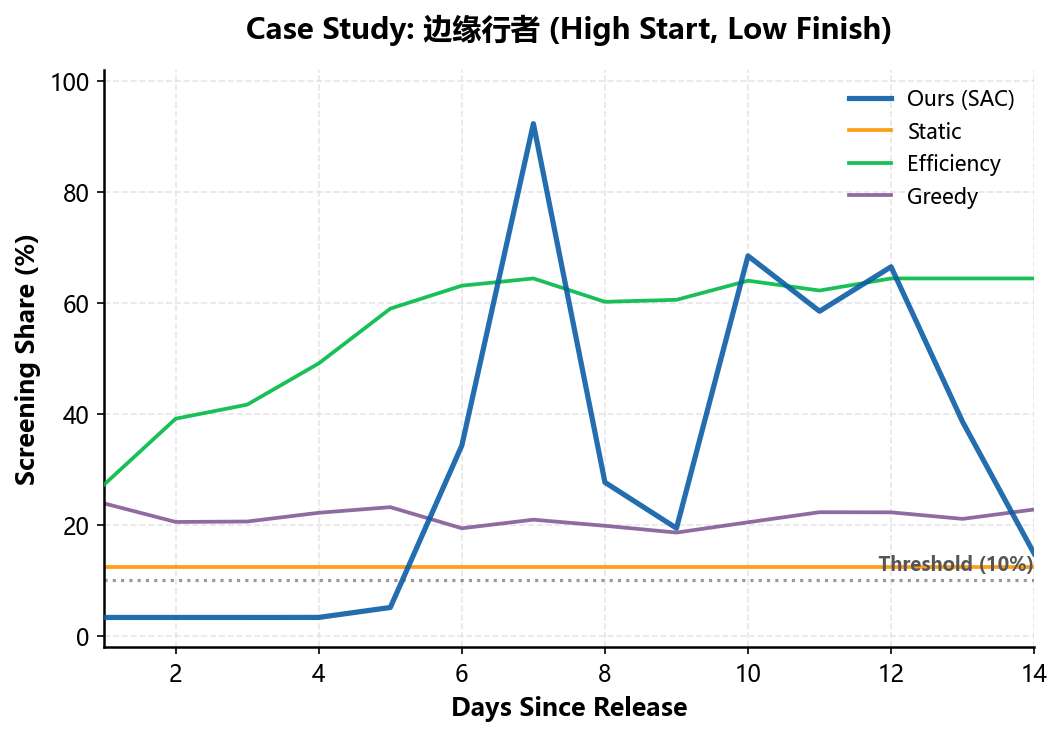

🎨 绘图: 《亡命救护车》


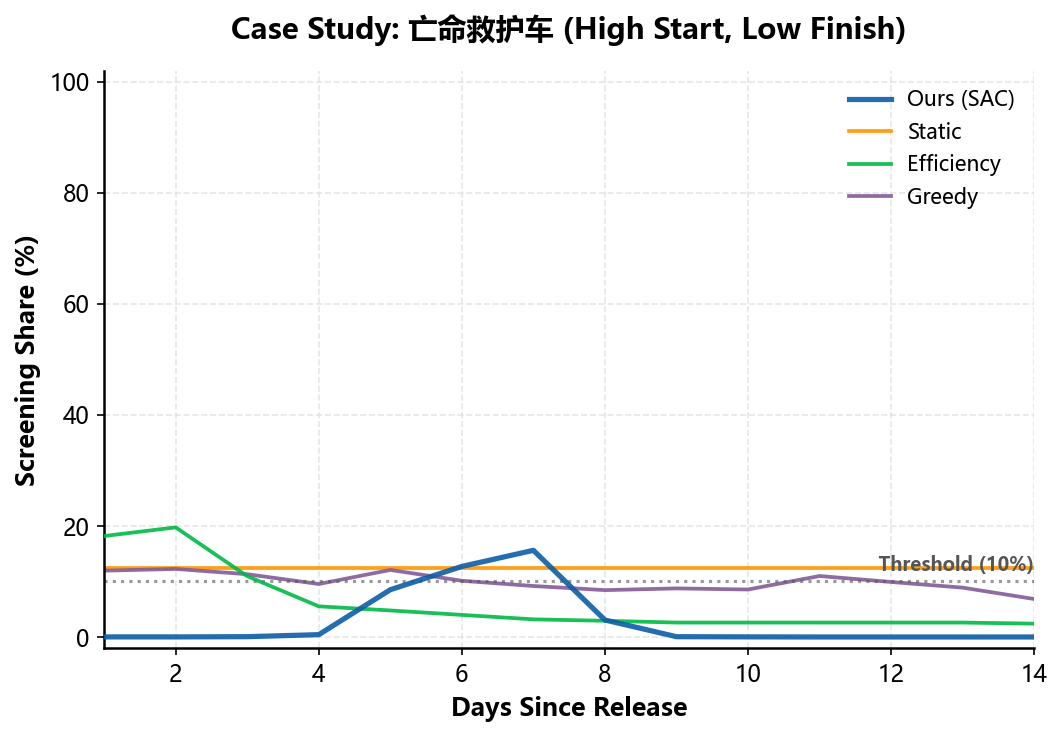

🎨 绘图: 《哆啦A梦：大雄的宇宙小战争2021》


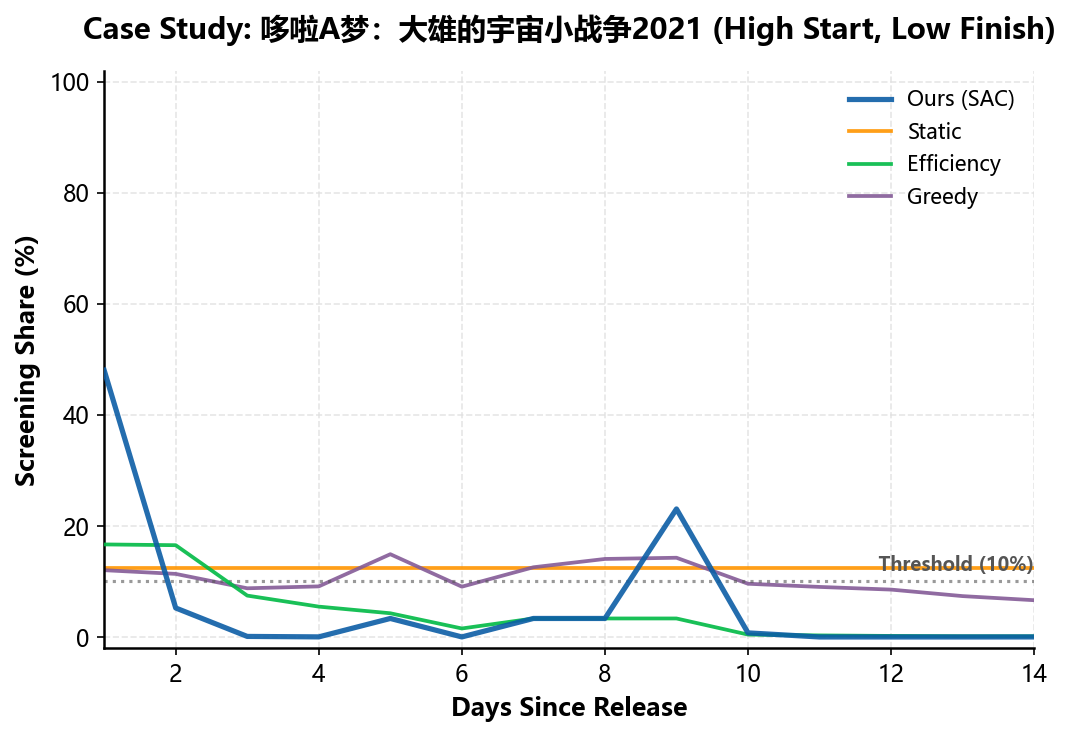

🎨 绘图: 《一周的朋友》


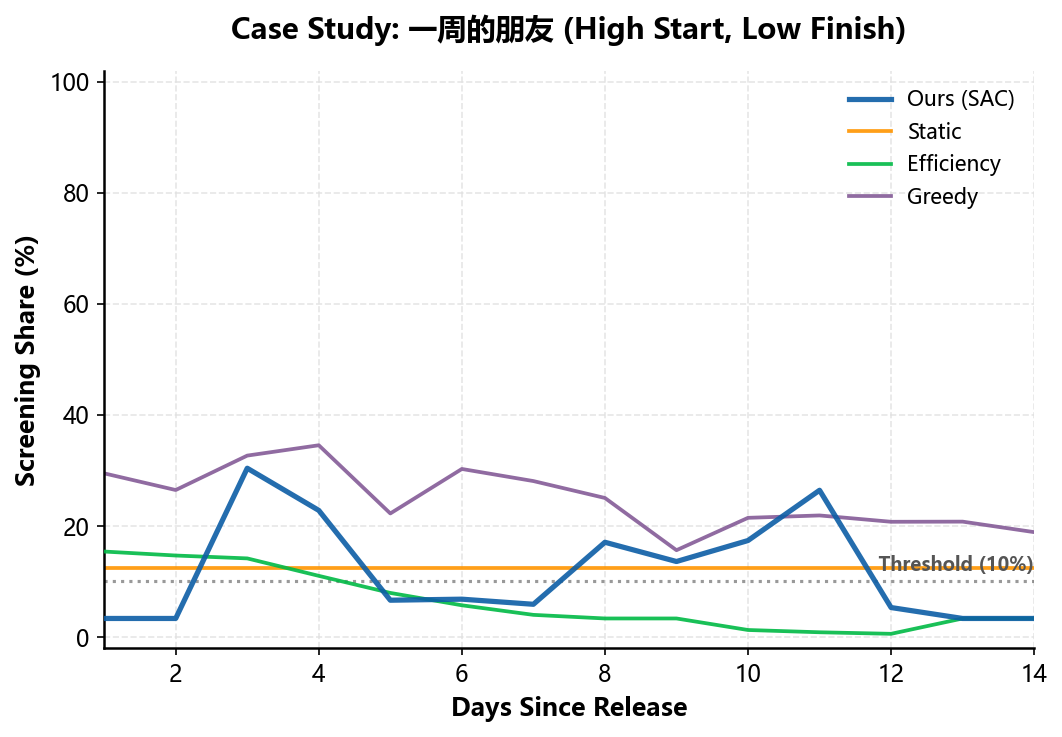

🎨 绘图: 《不能流泪的悲伤》


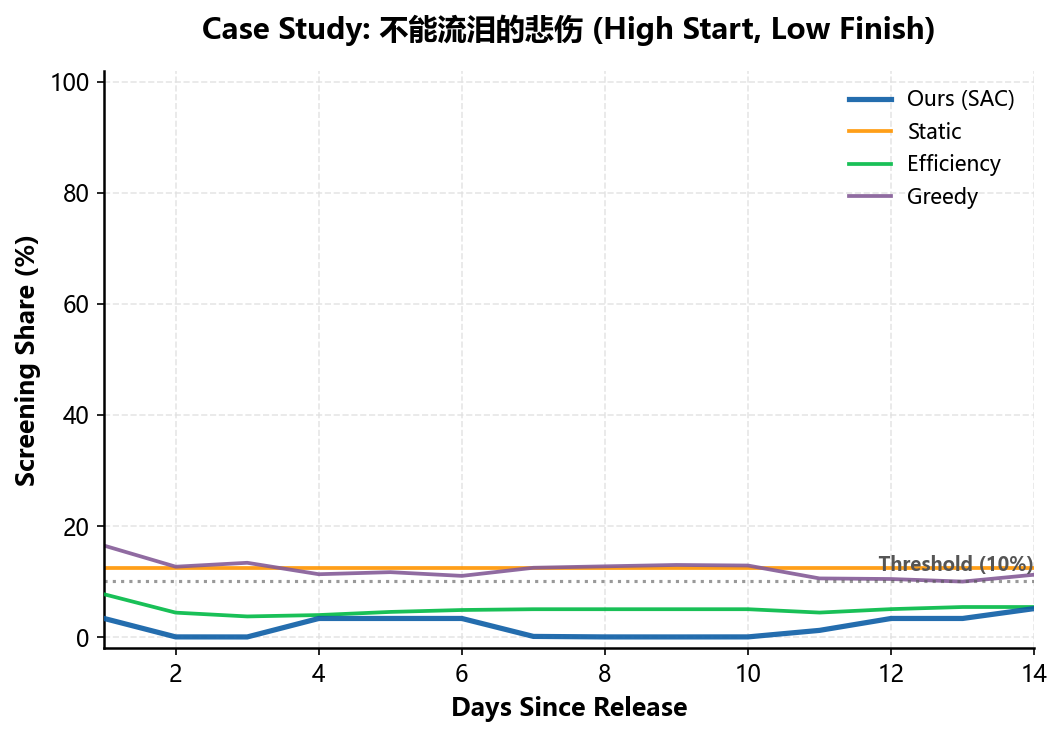

🎨 绘图: 《哆啦A梦：大雄与天空的理想乡》


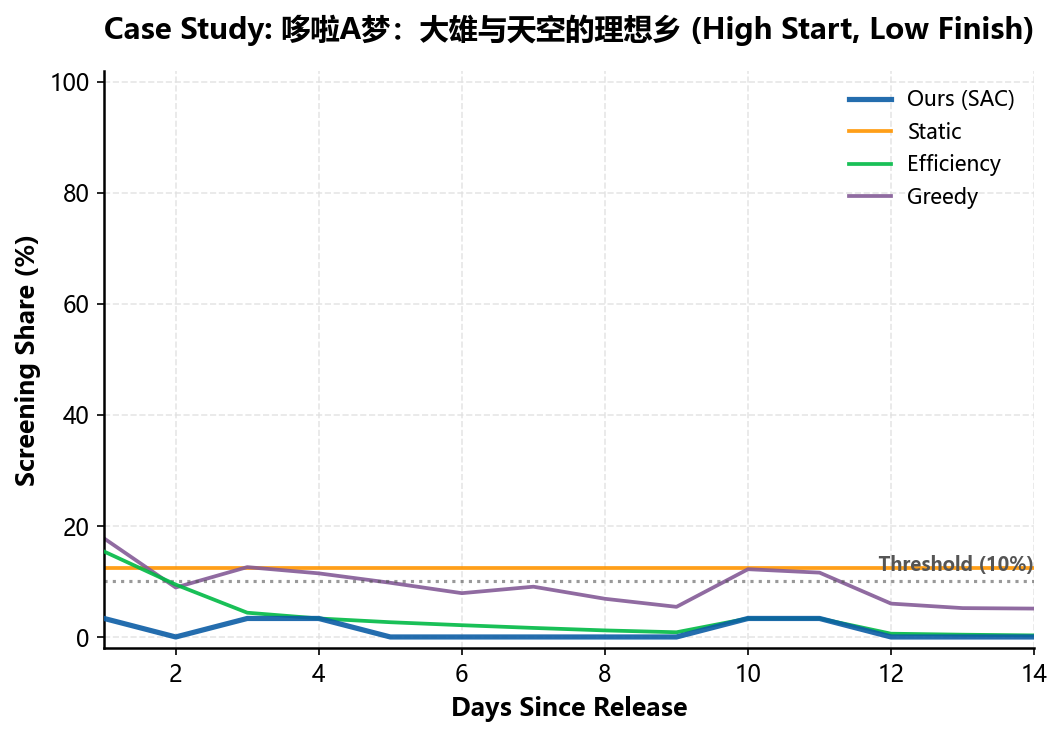

🎨 绘图: 《天空之城》


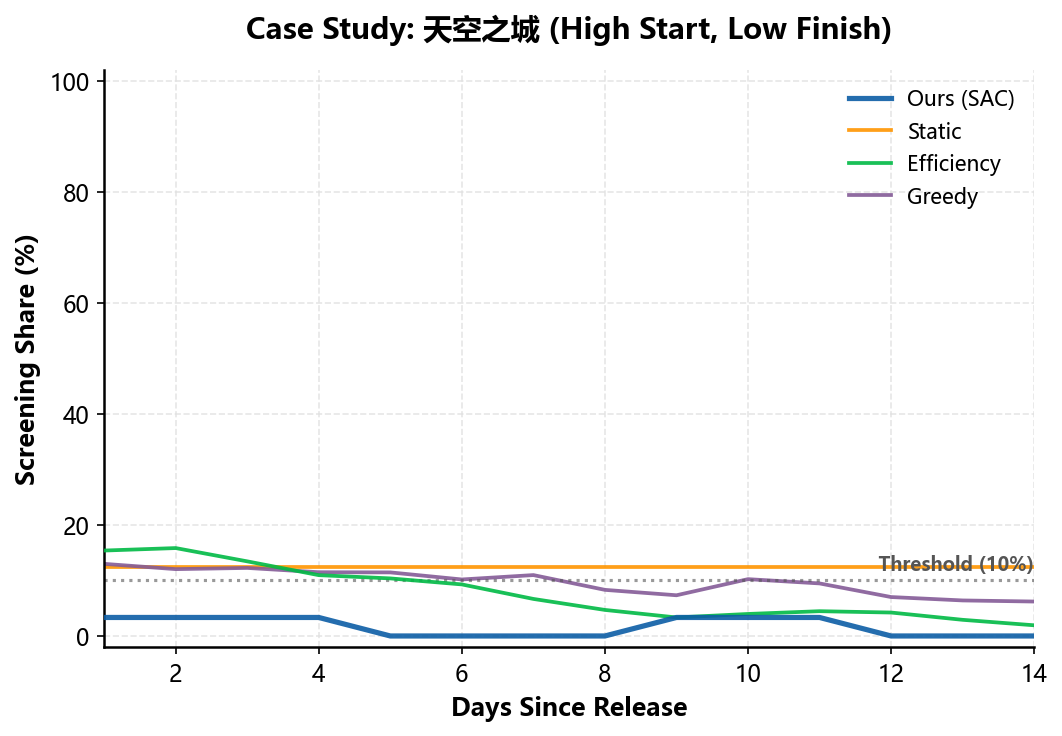

🎨 绘图: 《念念相忘》


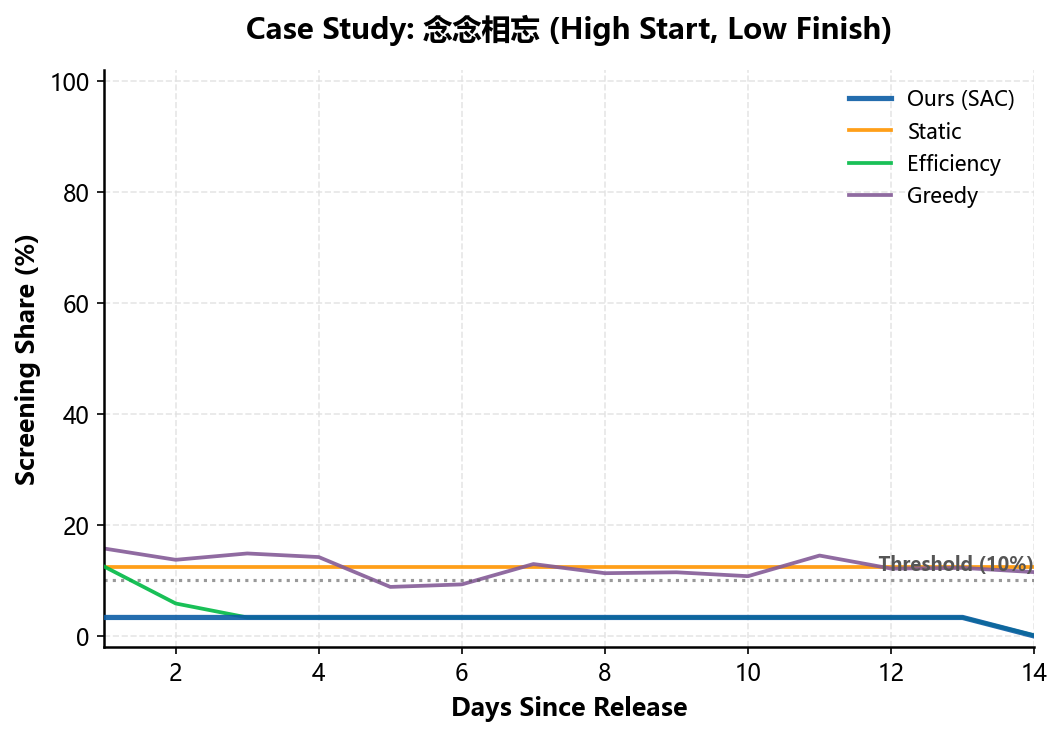

🎨 绘图: 《哆啦A梦：大雄的地球交响乐》


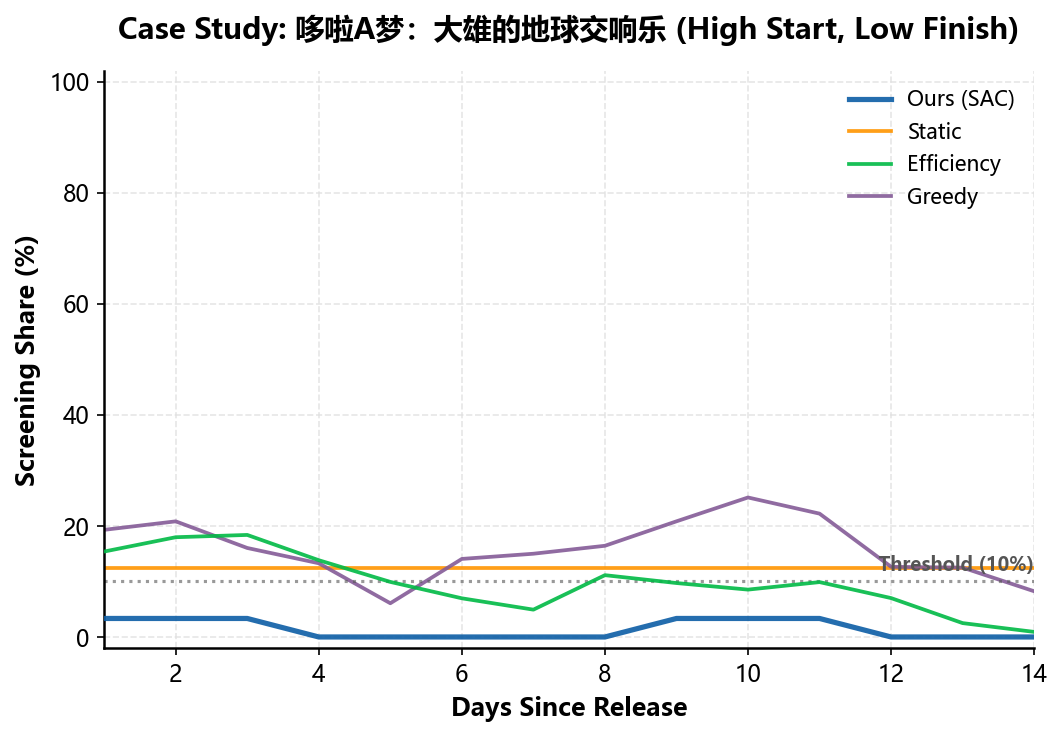

🎨 绘图: 《排球少年!! 垃圾场决战》


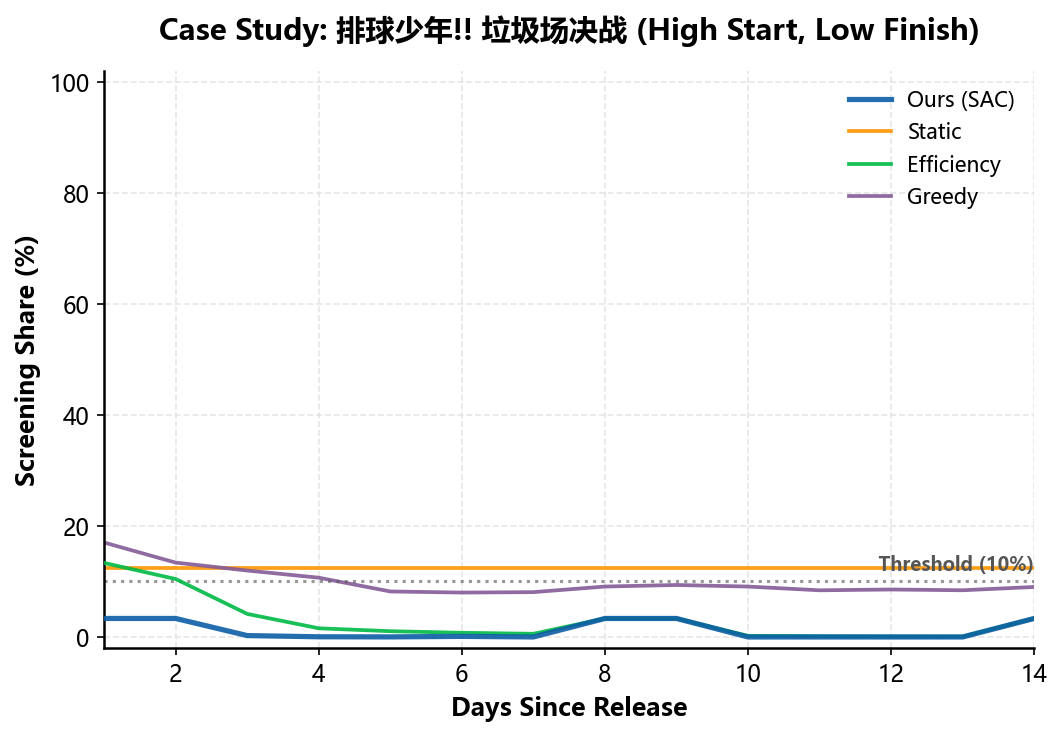

🎨 绘图: 《异人之下》


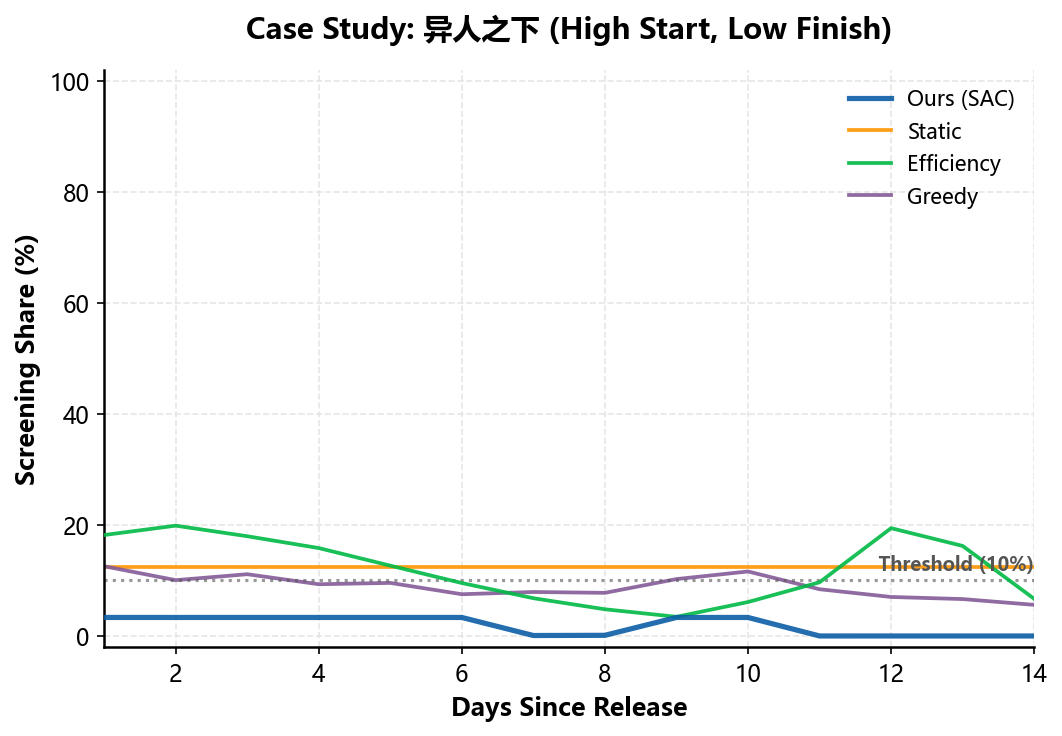

🎨 绘图: 《异形：夺命舰》


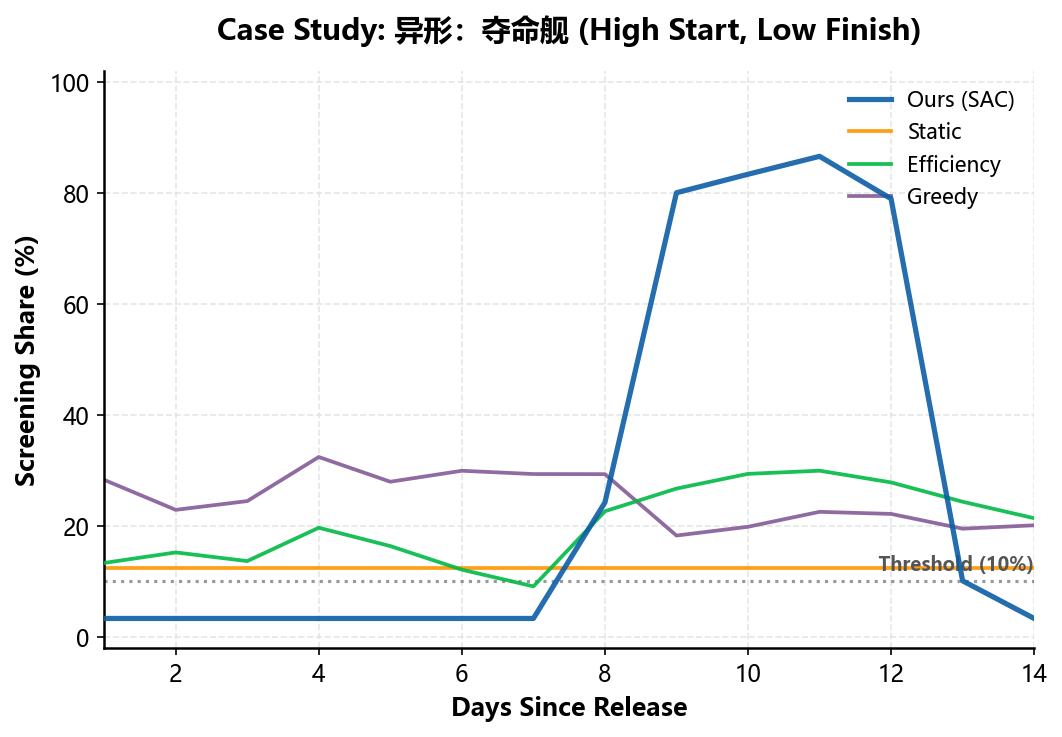

------------------------------------------------------------
✅ 所有高级感绘图已保存至:
   D:\App\Pycharm\1120MovieSchedulingSimulation\jupyters\plots\rotten_movie_pretty


In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys
import platform  # 用于检测操作系统

# ==============================================================================
# 0. 科研绘图风格配置
# ==============================================================================
def set_pub_style():
    sys_name = platform.system()
    if sys_name == "Windows":
        font_list = ['Microsoft YaHei', 'SimHei', 'Arial', 'sans-serif']
    elif sys_name == "Darwin":
        font_list = ['PingFang SC', 'Heiti TC', 'Arial Unicode MS', 'Arial', 'sans-serif']
    else:
        font_list = ['WenQuanYi Micro Hei', 'Noto Sans CJK SC', 'SimHei', 'Arial', 'sans-serif']
        
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = font_list
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.labelsize'] = 13
    plt.rcParams['xtick.labelsize'] = 11
    plt.rcParams['ytick.labelsize'] = 11
    plt.rcParams['legend.fontsize'] = 11
    
    plt.rcParams['axes.linewidth'] = 1.2
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['figure.dpi'] = 150

COLOR_PALETTE = {
    "SAC": "#0C5DA5",       
    "Efficiency": "#00B945",
    "Static": "#FF9500",    
    "Greedy": "#845B97",    
    "Ref": "#555555"        
}

# ==============================================================================
# 1. 数据加载
# ==============================================================================
def load_data(csv_path='logs/rotten_movies/rotten_evaluation_results.csv'):
    """读取CSV并解析JSON列"""
    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        current_dir = os.getcwd()

    possible_paths = [
        csv_path, 
        os.path.join(current_dir, csv_path),
        os.path.join(current_dir, 'logs', 'rotten_movies', 'rotten_evaluation_results.csv'),
        os.path.join(os.path.dirname(current_dir), 'logs', 'rotten_movies', 'rotten_evaluation_results.csv')
    ]
    
    found_path = None
    for p in possible_paths:
        if os.path.exists(p):
            found_path = p
            break
            
    if not found_path:
        print(f"❌ 错误：未找到数据文件。")
        return pd.DataFrame()

    print(f"📂 正在读取数据: {found_path}")
    try:
        df = pd.read_csv(found_path, encoding='utf-8')
    except:
        df = pd.read_csv(found_path, encoding='gbk')

    for col in ['daily_actions', 'daily_incomes']:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    
    if 'case_study_index' in df.columns:
        df['case_study_index'] = pd.to_numeric(df['case_study_index'], errors='coerce')

    return df

# ==============================================================================
# 2. 主分析逻辑
# ==============================================================================
def analyze_and_plot_pretty():
    set_pub_style()
    df = load_data()
    if df.empty: return

    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        current_dir = os.getcwd()

    plots_dir = os.path.join(current_dir, 'plots', 'rotten_movie_pretty')
    os.makedirs(plots_dir, exist_ok=True)
    print(f"📂 图片将保存至: {plots_dir}")
    
    ROTTEN_MOVIES = [
        '哆啦A梦：大雄的月球探险记', '上海堡垒', '小Q',
        '多力特的奇幻冒险', '喋血战士', '抵达之谜', '1917', '数码宝贝大冒险：最后的进化', 
        '地狱男爵：血皇后崛起', '一秒钟',
        '猫和老鼠', '你好世界', '了不起的老爸', '我没谈完的那场恋爱', '革命者', '梅艳芳', '铁道英雄',
        '黑客帝国：矩阵重启', '神秘海域', '精灵旅社4：变身大冒险', '边缘行者', '亡命救护车', 
        '哆啦A梦：大雄的宇宙小战争2021', '一周的朋友',
        '不能流泪的悲伤', '哆啦A梦：大雄与天空的理想乡', '天空之城', '念念相忘',
        '哆啦A梦：大雄的地球交响乐', '排球少年!! 垃圾场决战', '异人之下', '异形：夺命舰'
    ]

    unique_cases = df[['start_date', 'case_study_movie']].drop_duplicates()
    print(f"\n🚀 开始绘制高级感图表，共 {len(unique_cases)} 个案例...")

    PLOT_DAYS = 14 
    # 【修改】 阈值改为 10 (即 10%)
    THRESHOLD = 10.0 
    
    # 【修改】 Y轴上限设为 100
    Y_MAX_LIMIT = 100.0 

    for _, row in unique_cases.iterrows():
        date = row['start_date']
        movie = row['case_study_movie']
        
        if movie not in ROTTEN_MOVIES: continue
        
        case_df = df[(df['start_date'] == date) & (df['case_study_movie'] == movie)].copy()
        if case_df.empty: continue
            
        print(f"🎨 绘图: 《{movie}》")

        fig, ax = plt.subplots(figsize=(8, 5))
        
        policy_map = {
            "RL (SAC)": {"label": "Ours (SAC)", "color": COLOR_PALETTE["SAC"], "z": 10},
            "效率启发式策略": {"label": "Efficiency", "color": COLOR_PALETTE["Efficiency"], "z": 3},
            "静态启发式策略": {"label": "Static", "color": COLOR_PALETTE["Static"], "z": 2},
            "贪婪启发式策略": {"label": "Greedy", "color": COLOR_PALETTE["Greedy"], "z": 2}
        }
        
        policies = case_df['policy'].unique()
        
        for policy_name in policies:
            run = case_df[case_df['policy'] == policy_name].iloc[0]
            idx = run['case_study_index']
            if pd.isna(idx): continue
            idx = int(idx)
            actions = run['daily_actions']
            
            y_values = []
            for day_act in actions[:PLOT_DAYS]:
                if len(day_act) > idx:
                    # 【修改】 乘以 100，转为百分比
                    y_values.append(day_act[idx] * 100) 
                else:
                    y_values.append(0)
            
            x_values = range(1, len(y_values) + 1)
            
            style = policy_map.get(policy_name, {"label": policy_name, "color": "#333333", "z": 1})
            lw = 2.5 if "SAC" in policy_name else 1.8
            
            ax.plot(x_values, y_values, 
                    label=style["label"], 
                    color=style["color"], 
                    linewidth=lw, 
                    alpha=0.9, 
                    zorder=style["z"])

        # --- 高级感修饰 ---
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.2)
        ax.spines['bottom'].set_linewidth(1.2)

        ax.axhline(y=THRESHOLD, color=COLOR_PALETTE["Ref"], linestyle=':', linewidth=1.5, alpha=0.6)
        # 【修改】 文本显示 "10%"
        ax.text(PLOT_DAYS, THRESHOLD + 1.0, ' Threshold (10%)', 
                color=COLOR_PALETTE["Ref"], fontsize=9, va='bottom', ha='right', fontweight='bold')
        
        ax.set_title(f"Case Study: {movie} (High Start, Low Finish)", fontsize=14, fontweight='bold', pad=15)
        ax.set_xlabel("Days Since Release", fontsize=12, fontweight='bold')
        # 【修改】 Y轴标签为 (%)
        ax.set_ylabel("Screening Share (%)", fontsize=12, fontweight='bold')
        
        ax.set_xlim(1, PLOT_DAYS)
        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        
        # 【修改】 统一纵坐标范围 0 - 100
        ax.set_ylim(bottom=-2, top=Y_MAX_LIMIT + 2) 
        
        ax.grid(True, linestyle='--', color='#E0E0E0', alpha=0.8, zorder=0)
        ax.legend(frameon=False, loc='upper right', fontsize=10)
        
        safe_name = movie.replace('·', '').replace('：', '').replace(':', '').replace(' ', '')
        filename = f"{safe_name}_style.png"
        save_path = os.path.join(plots_dir, filename)
        
        plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        plt.close(fig) 

    print("-" * 60)
    print(f"✅ 所有高级感绘图已保存至:\n   {plots_dir}")

if __name__ == "__main__":
    analyze_and_plot_pretty()

📂 正在读取数据: D:\App\Pycharm\1120MovieSchedulingSimulation\logs\rotten_movies\rotten_evaluation_results.csv

📉 烂片/高开低走 止损速度统计 (阈值: 10.0%)
   数值代表：第几天排片占比跌破 10% (数值越小越好，代表反应快)
policy             RL (SAC)  效率启发式策略  贪婪启发式策略  静态启发式策略
1917                    1.0     12.0      8.0     45.0
一周的朋友                   1.0      5.0     29.0     45.0
一秒钟                     1.0      2.0      2.0     45.0
上海堡垒                    1.0      2.0      2.0     45.0
不能流泪的悲伤                 1.0      1.0     13.0     45.0
了不起的老爸                  1.0      4.0     16.0     45.0
亡命救护车                   1.0      4.0      4.0     45.0
你好世界                    1.0      1.0      1.0     45.0
哆啦A梦：大雄与天空的理想乡          1.0      2.0      2.0     45.0
哆啦A梦：大雄的地球交响乐           1.0      5.0      5.0     45.0
哆啦A梦：大雄的宇宙小战争2021       2.0      3.0      3.0     45.0
哆啦A梦：大雄的月球探险记           1.0      4.0      4.0     45.0
喋血战士                    1.0      4.0      9.0     45.0
地狱男爵：血皇后崛起              1.0      4.0     10.0     45.0
多力特的

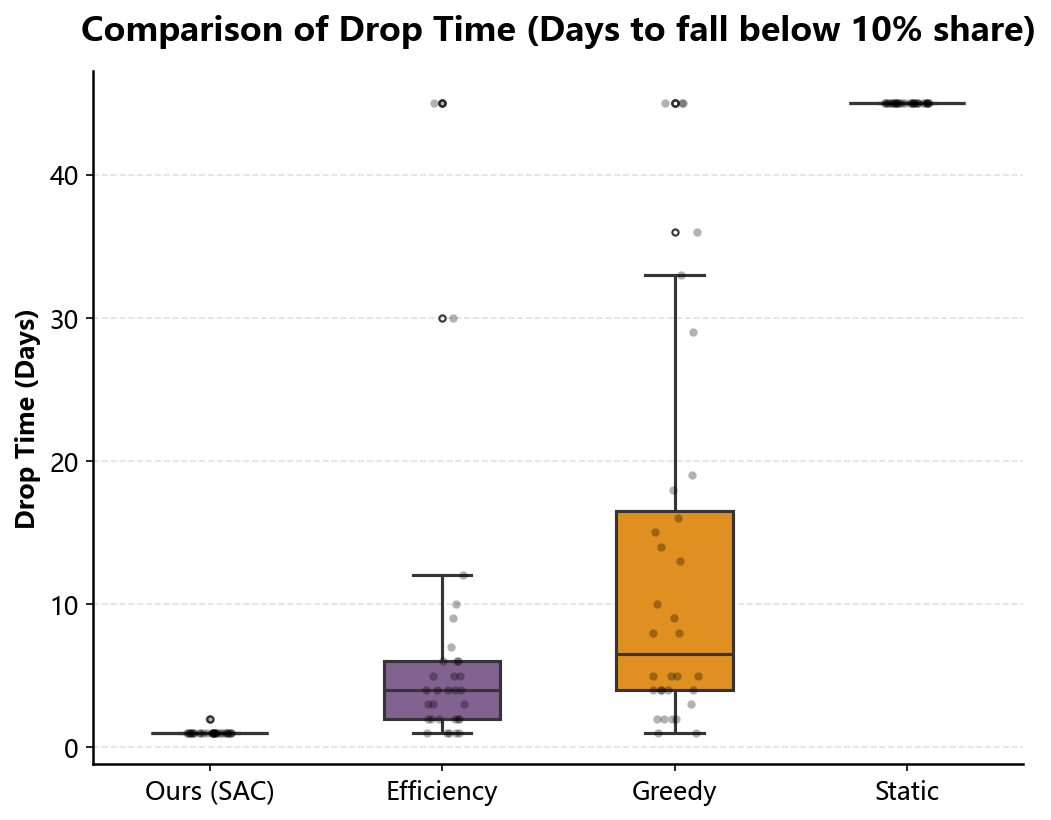

✅ 止损统计图表已保存至: D:\App\Pycharm\1120MovieSchedulingSimulation\jupyters\plots\analysis_summary\drop_time_comparison.png


In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# ==============================================================================
# 0. 科研绘图风格配置 (Science/Nature Style)
# ==============================================================================
def set_pub_style():
    sys_name = platform.system()
    if sys_name == "Windows":
        font_list = ['Microsoft YaHei', 'SimHei', 'Arial', 'sans-serif']
    elif sys_name == "Darwin":
        font_list = ['PingFang SC', 'Heiti TC', 'Arial Unicode MS', 'Arial', 'sans-serif']
    else:
        font_list = ['WenQuanYi Micro Hei', 'Noto Sans CJK SC', 'SimHei', 'Arial', 'sans-serif']
        
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = font_list
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['axes.linewidth'] = 1.5
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['figure.dpi'] = 150

COLOR_PALETTE = {
    "SAC": "#0C5DA5",       
    "Efficiency": "#00B945",
    "Static": "#FF9500",    
    "Greedy": "#845B97",    
}

# ==============================================================================
# 1. 数据加载
# ==============================================================================
def load_data(csv_path='logs/rotten_movies/rotten_evaluation_results.csv'):
    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        current_dir = os.getcwd()

    # 路径指向 rotten_movies
    possible_paths = [
        csv_path, 
        os.path.join(current_dir, csv_path),
        os.path.join(current_dir, 'logs', 'rotten_movies', 'rotten_evaluation_results.csv'),
        os.path.join(os.path.dirname(current_dir), 'logs', 'rotten_movies', 'rotten_evaluation_results.csv')
    ]
    
    found_path = None
    for p in possible_paths:
        if os.path.exists(p):
            found_path = p
            break
            
    if not found_path:
        print(f"❌ 错误：未找到数据文件。请检查路径。")
        return pd.DataFrame()

    print(f"📂 正在读取数据: {found_path}")
    try:
        df = pd.read_csv(found_path, encoding='utf-8')
    except:
        df = pd.read_csv(found_path, encoding='gbk')

    for col in ['daily_actions', 'daily_incomes']:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    
    if 'case_study_index' in df.columns:
        df['case_study_index'] = pd.to_numeric(df['case_study_index'], errors='coerce')

    return df

# ==============================================================================
# 2. 计算止损时间 (第几天跌破阈值)
# ==============================================================================
def calculate_drop_days(daily_actions, movie_index, threshold=0.10, max_days=45):
    """
    计算第几天排片占比首次 <= threshold (10%)。
    数值越小越好（代表快速止损）。
    """
    if pd.isna(movie_index): return np.nan
    movie_index = int(movie_index)
    
    for day, schedule in enumerate(daily_actions):
        if len(schedule) > movie_index:
            # 【核心逻辑修改】改为 <= (跌破)
            if schedule[movie_index] <= threshold:
                return day + 1
    return max_days

# ==============================================================================
# 3. 主分析与绘图
# ==============================================================================
def analyze_drop_time():
    set_pub_style()
    df = load_data()
    if df.empty: return

    # 烂片名单 (32部)
    ROTTEN_MOVIES = [
        '哆啦A梦：大雄的月球探险记', '上海堡垒', '小Q', 
        '多力特的奇幻冒险', '喋血战士', '抵达之谜', '1917', '数码宝贝大冒险：最后的进化', 
        '地狱男爵：血皇后崛起', '一秒钟', 
        '猫和老鼠', '你好世界', '了不起的老爸', '我没谈完的那场恋爱', '革命者', '梅艳芳', '铁道英雄',
        '黑客帝国：矩阵重启', '神秘海域', '精灵旅社4：变身大冒险', '边缘行者', '亡命救护车', 
        '哆啦A梦：大雄的宇宙小战争2021', '一周的朋友',
        '不能流泪的悲伤', '哆啦A梦：大雄与天空的理想乡', '天空之城', '念念相忘',
        '哆啦A梦：大雄的地球交响乐', '排球少年!! 垃圾场决战', '异人之下', '异形：夺命舰'
    ]
    
    df = df[df['case_study_movie'].isin(ROTTEN_MOVIES)].copy()
    
    # 止损阈值：10%
    THRESHOLD = 0.10
    df['drop_day'] = df.apply(
        lambda r: calculate_drop_days(r['daily_actions'], r['case_study_index'], THRESHOLD), 
        axis=1
    )
    
    # 生成汇总表格
    summary_table = df.pivot_table(
        index='case_study_movie', 
        columns='policy', 
        values='drop_day',
        aggfunc='mean'
    )
    
    policy_order = ["RL (SAC)", "效率启发式策略", "贪婪启发式策略", "静态启发式策略"]
    available_cols = [c for c in policy_order if c in summary_table.columns]
    summary_table = summary_table[available_cols]
    
    mean_row = summary_table.mean().to_frame().T
    mean_row.index = ['Average (平均)']
    final_table = pd.concat([summary_table, mean_row])
    
    print("\n" + "="*80)
    print(f"📉 烂片/高开低走 止损速度统计 (阈值: {THRESHOLD*100}%)")
    print("   数值代表：第几天排片占比跌破 10% (数值越小越好，代表反应快)")
    print("="*80)
    
    print(final_table.round(1).to_string()) 
    print("="*80 + "\n")

    # 绘图逻辑
    plot_df = df[df['policy'].isin(policy_order)].copy()
    name_map = {
        "RL (SAC)": "Ours (SAC)",
        "效率启发式策略": "Efficiency",
        "静态启发式策略": "Static",
        "贪婪启发式策略": "Greedy"
    }
    plot_df['Policy_En'] = plot_df['policy'].map(name_map)
    order_en = [name_map[p] for p in policy_order if p in name_map]
    
    colors = []
    for p in policy_order:
        if p in name_map:
            key = "SAC" if "SAC" in p else ("Efficiency" if "效率" in p else ("Static" if "静态" in p else "Greedy"))
            colors.append(COLOR_PALETTE[key])

    fig, ax = plt.subplots(figsize=(8, 6))
    
    # 箱线图
    sns.boxplot(
        data=plot_df, 
        x='Policy_En', 
        y='drop_day',
        hue='Policy_En',
        order=order_en,
        palette=colors,
        width=0.5,
        linewidth=1.5,
        fliersize=3,
        legend=False,
        ax=ax
    )
    
    # 散点图
    sns.stripplot(
        data=plot_df,
        x='Policy_En',
        y='drop_day',
        order=order_en,
        color='black',
        alpha=0.3,
        size=4,
        jitter=True,
        ax=ax
    )

    ax.set_title('Comparison of Drop Time (Days to fall below 10% share)', fontweight='bold', pad=15)
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('Drop Time (Days)', fontsize=12, fontweight='bold')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)
    
    ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey', alpha=0.7)
    ax.set_axisbelow(True)

    try:
        current_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        current_dir = os.getcwd()
        
    save_dir = os.path.join(current_dir, 'plots', 'analysis_summary')
    os.makedirs(save_dir, exist_ok=True)
    save_path = os.path.join(save_dir, 'drop_time_comparison.png')
    
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ 止损统计图表已保存至: {save_path}")

if __name__ == "__main__":
    analyze_drop_time()